In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb

import sys
sys.path.append("/mnt/c/Users/dambr/Desktop/AstroCosmoComputational/Students/Anna_DAmbrosio/")

from scipy.interpolate import interp1d
from pyACC.clustering import *

In [2]:
Omega_b = 0.05
omega_c = 0.25

h = 0.7
As = 2.1e-9
ns = 0.96

pars = camb.CAMBparams()
pars.set_cosmology(H0=100*h, ombh2=Omega_b*h**2, omch2=omega_c*h**2)
pars.InitPower.set_params(As=As, ns=ns)

pars.set_matter_power(redshifts=[10.], kmax=100.0)
result = camb.get_results(pars)

kh, z, pk = result.get_matter_power_spectrum(minkh=1e-4, maxkh=100, npoints = 512)

pk_func = interp1d(kh, pk[0], kind='cubic', fill_value="extrapolate")

In [3]:
side = 500 # Mpc/h
spacing = 5 # Mpc/h

In [4]:
delta_k, delta_x = generate_gaussian_map(pk_func, side, spacing)

In [5]:
n_kf = 3
k_bins, pk_meas = get_power_spectrum(delta_k, side, spacing, n_kf=n_kf)

/home/anna/anaconda3/envs/acc-env/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/home/anna/anaconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/anaconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


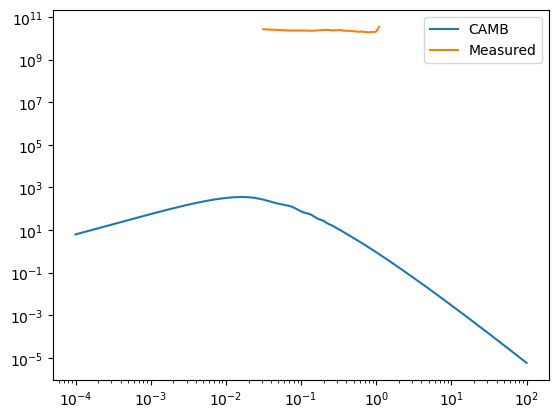

In [6]:
plt.loglog(kh, pk[0], label='CAMB')
plt.loglog(k_bins, pk_meas, label='Measured')
plt.legend()

In [7]:
# generate points
n_mean = 1.e-3
Volume = side**3
N_part = Volume*n_mean

In [8]:
n_x = n_mean*(1+delta_x)

In [9]:
Nobj_x = n_x *spacing**3 # non è ancora un numero interp, la usiamo come media di una dostribuzione di poisson

In [10]:
Npart = np.random.poisson(Nobj_x) # ora abbiamo numeri discreti di particelle

In [11]:
np.sum(Npart) # deve venire circa il numero di particelle che ci aspettiamo

124672

In [12]:
N_mean = n_mean * spacing**3
delta_N_x = Npart/N_mean -1

In [13]:
k_bin, pk_N_meas = get_power_spectrum(delta_k, side, spacing, n_kf=n_kf)

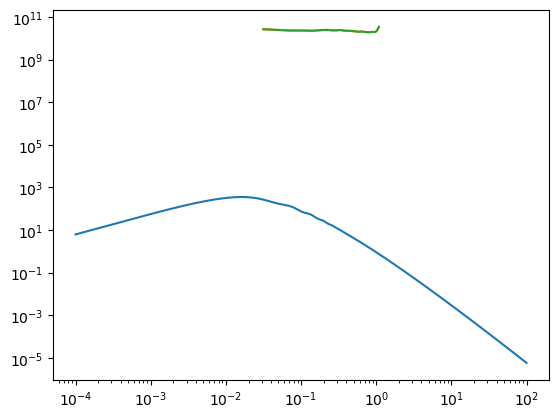

In [14]:
plt.loglog(kh, pk_func(kh), label='CAMB')
plt.loglog(k_bin, pk_N_meas, label='Sampled')
plt.loglog(k_bins, pk_meas, label='Measured')

## Lezione 22/05

In [15]:
Omega_b = 0.05
omega_c = 0.25

h = 0.7
As = 2.1e-9
ns = 0.96

pars = camb.CAMBparams()
pars.set_cosmology(H0=100*h, ombh2=Omega_b*h**2, omch2=omega_c*h**2)
pars.InitPower.set_params(As=As, ns=ns)

pars.set_matter_power(redshifts=[10.], kmax=100.0)
result = camb.get_results(pars)

kh, z, pk = result.get_matter_power_spectrum(minkh=1e-4, maxkh=100, npoints = 512)

pk_func = interp1d(kh, pk[0], kind='cubic', fill_value="extrapolate")

In [16]:
side = 500 # Mpc/h
spacing = 5 # Mpc/h

In [17]:
delta_k, delta_x = generate_gaussian_map(pk_func, side, spacing)

In [18]:
Nobjects = 10000
catalog = poisson_sample_map(delta_x, side, spacing, Nobjects)

In [19]:
catalog.shape

(9978, 3)

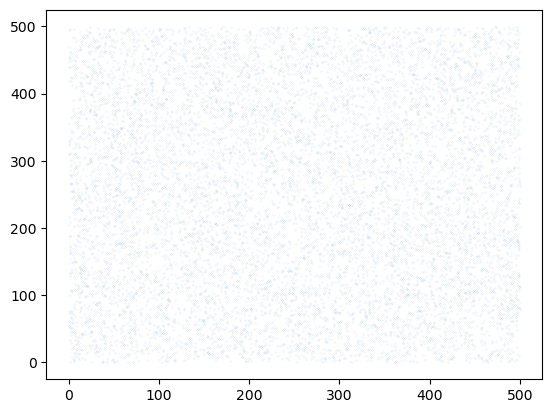

In [20]:
plt.plot(catalog[:,0], catalog[:,1], '.', ms=0.1)

In [21]:
# r_edges = np.linspace(0, 50, 11)
#r, DD, RR, DR = counting_pairs(catalog, catalog, r_max= 50, r_min=0, n_bin=11, output = 'all')

In [22]:
random_sample = np.random.uniform(0, side, (Nobjects, 3))

In [23]:
r,xi = correlation_function(catalog, catalog, r_max=50, r_min=0, n_bin=11, type='LS')

DD:   0%|          | 0/9978 [00:00<?, ?it/s]

RR:   0%|          | 0/9978 [00:00<?, ?it/s]

DR:   0%|          | 0/9978 [00:00<?, ?it/s]

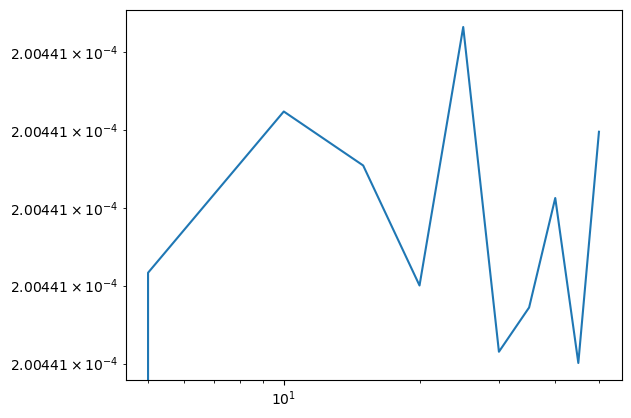

In [24]:
plt.loglog(r, xi)